In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
%matplotlib inline

In [55]:
df=sns.load_dataset("iris")

In [56]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


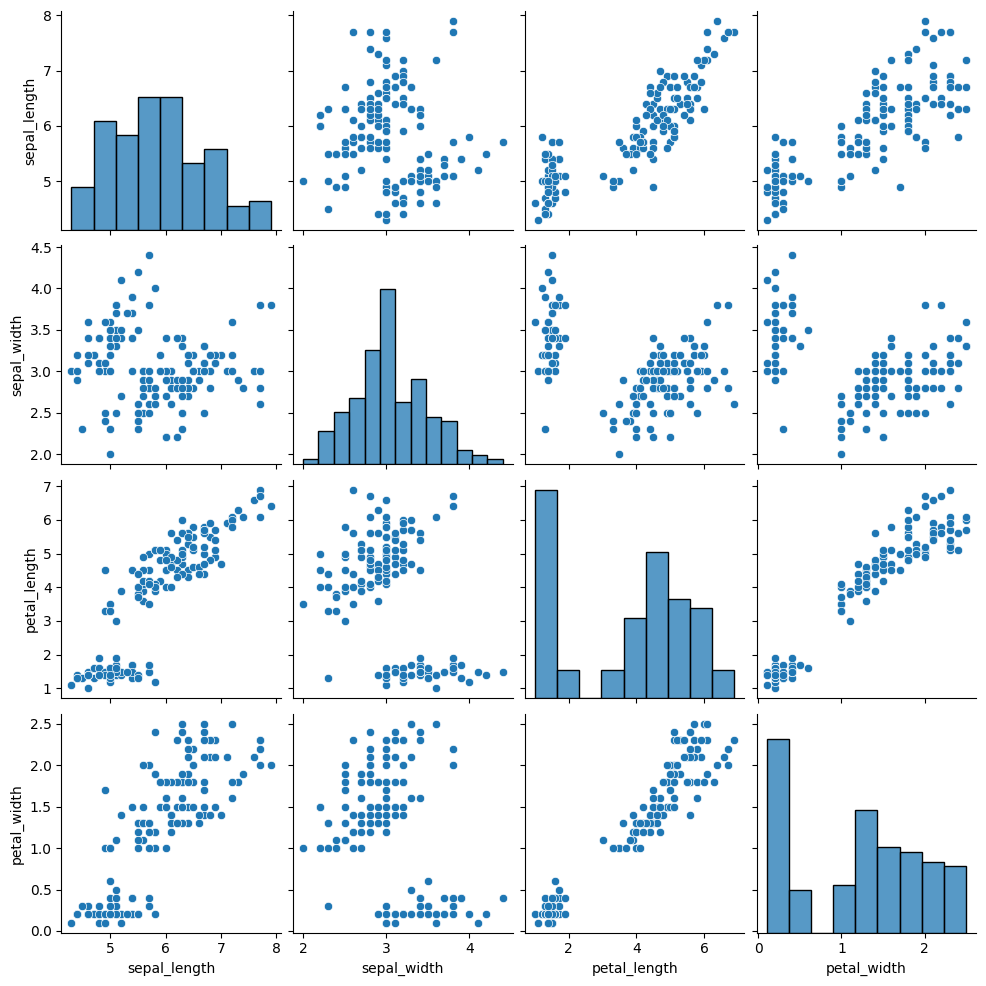

In [57]:
sns.pairplot(df)

In [58]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


<ipython-input-59-03e499991d45>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="viridis")


<Axes: >

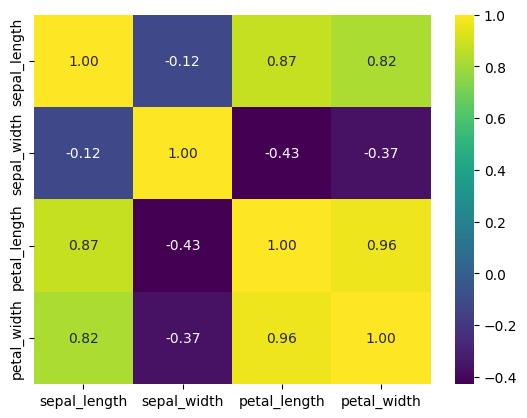

In [59]:
sns.heatmap(df.corr(),annot=True,fmt=".2f",cmap="viridis")

In [60]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [61]:
df["species"].apply(lambda x:1 if x=="setosa" else (2 if x=="versicolor" else 3)).unique()

array([1, 2, 3])

In [62]:
df["species"]=df["species"].map({"setosa":0,"versicolor":1,"virginica":2})

In [63]:
df["species"].unique()

array([0, 1, 2])

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [66]:
x.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [67]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: species, dtype: int64

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [70]:
X_train.shape

(120, 4)

In [71]:
y_train

8      0
106    2
76     1
9      0
89     1
      ..
37     0
2      0
33     0
52     1
3      0
Name: species, Length: 120, dtype: int64

In [72]:
X_test.value_counts()

sepal_length  sepal_width  petal_length  petal_width
4.4           3.0          1.3           0.2            1
              3.2          1.3           0.2            1
6.9           3.1          5.1           2.3            1
6.7           3.1          5.6           2.4            1
              3.0          5.0           1.7            1
6.6           3.0          4.4           1.4            1
              2.9          4.6           1.3            1
6.5           3.0          5.8           2.2            1
                           5.5           1.8            1
                           5.2           2.0            1
6.4           3.2          4.5           1.5            1
              2.8          5.6           2.2            1
6.3           3.3          4.7           1.6            1
6.1           3.0          4.9           1.8            1
              2.9          4.7           1.4            1
              2.6          5.6           1.4            1
6.0           3.0  

In [73]:
y_test.value_counts()

0    10
2    10
1    10
Name: species, dtype: int64

In [74]:
scale=StandardScaler()

In [78]:
X_train_scaled=scale.fit_transform(X_train)
X_test_scaled=scale.transform(X_test)

In [79]:
X_train_scaled.shape

(120, 4)

In [80]:
X_train_scaled.shape

(120, 4)

In [81]:
type(X_train_scaled)

numpy.ndarray

<ipython-input-82-3c371991cf7a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train_scaled)


<Axes: ylabel='Density'>

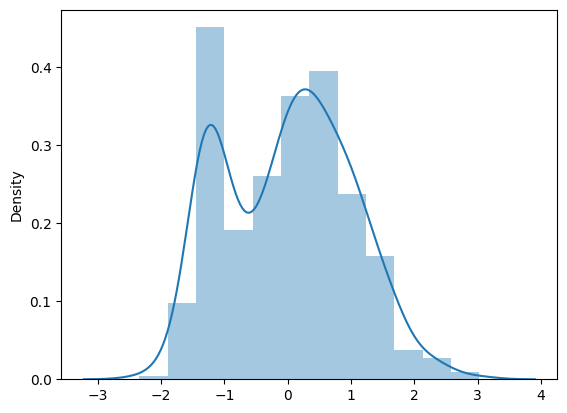

In [82]:
sns.distplot(X_train_scaled)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

In [84]:
model1=RandomForestClassifier()
model2=DecisionTreeClassifier()

In [85]:
model1.fit(X_train_scaled,y_train)

RandomForestClassifier()

In [90]:
pred=model1.predict(X_test_scaled)

In [91]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [94]:
model1.score(X_train_scaled,y_train)

1.0

In [95]:
print(classification_report(pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



Text(50.722222222222214, 0.5, 'Actual')

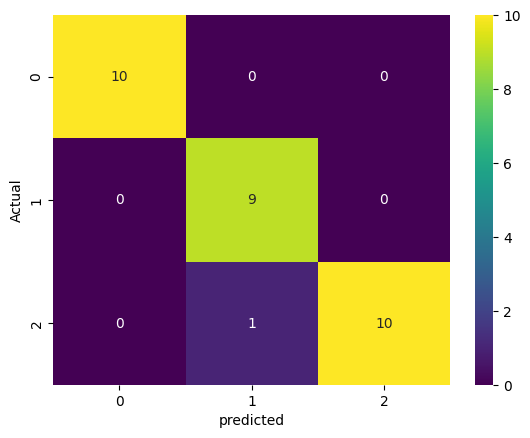

In [102]:
sns.heatmap(confusion_matrix(pred,y_test),annot=True,cmap="viridis")
plt.xlabel("predicted")
plt.ylabel("Actual")

In [103]:
from sklearn.pipeline import Pipeline

In [104]:
aa=Pipeline([
    ("scaler",StandardScaler()),
    ("tree",DecisionTreeClassifier())


])

In [107]:
aa.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('tree', DecisionTreeClassifier())])

In [109]:
y_pred=aa.predict(X_test)

In [110]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      1.00      0.95         9
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [113]:
aa.score(X_test,y_test)

0.9666666666666667

In [114]:
model1.score(X_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


0.3333333333333333